# Exploring California Government Data on Housing
Using data from data.ca.gov, this project will explore types of housing projects approved in the State of California. These datasets can be found [here](https://data.ca.gov/dataset/housing-element-annual-progress-report-apr-data-by-jurisdiction-and-year). The first dataset contains data on housing development applications submitted to the State of California for approval. Examples of data in Table A include: 
* Information on the types of devlopment (i.e. single-family detached unit) 
* Whether the unit(s) will be owner-occupied or for rental 
* Number of units for specific income level (whether deed specified or not) 

To start, I will look into data from the first dataset of eight available. This project is mainly an exploratory project with the goal to practice and learn new skills in Python. Beyond learning, my goal is to understand the percentage (and raw number) of development proposals contain units designated for low-income housing, the percentage of units in each development, and the percentage of proposals approved by the State. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fix for columns with mixed dtype
col_dtypes = {4: str,
              6: str,
              25: str}

apr_table_a = pd.read_csv('datasets/table-a-housing-development-applications-submitted.csv', dtype=col_dtypes)

## Exploring and Cleaning
In order to gain insights from these data, we will explore the dataset and clean entries to make them useful in our analysis. First, however, we will change our column names to lowercase.

In [2]:
apr_table_a.columns = apr_table_a.columns.str.lower()

apr_table_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153476 entries, 0 to 153475
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   jurs_name               153475 non-null  object 
 1   cnty_name               153475 non-null  object 
 2   year                    153475 non-null  float64
 3   apn                     152809 non-null  object 
 4   prior_apn               14668 non-null   object 
 5   street_address          149452 non-null  object 
 6   project_name            57894 non-null   object 
 7   jurs_tracking_id        127272 non-null  object 
 8   unit_cat                153475 non-null  object 
 9   tenure                  153475 non-null  object 
 10  app_submit_dt           153476 non-null  object 
 11  vlow_income_dr          153475 non-null  float64
 12  vlow_income_ndr         153475 non-null  float64
 13  low_income_dr           153475 non-null  float64
 14  low_income_ndr      

In [3]:
apr_table_a[apr_table_a['jurs_name'].isnull()].head(10)

,jurs_name,cnty_name,year,apn,prior_apn,street_address,project_name,jurs_tracking_id,unit_cat,tenure,...,mod_income_ndr,above_mod_income,tot_proposed_units,tot_approved_units,tot_disapproved_units,app_submitted_sb35,density_bonus_received,density_bonus_approved,application_status,notes
153475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## First Look
On a first glace at the `apr_table_a` dataset, we notice that there is one row with entirely `NaN` values. We will remove this row before moving further.

After remove the above mentioned row, we will have several columns containing `NaN` values:
* `apn`: The unique identifier for the devlopment project
* `prior_apn`: Previous identifier for the project
* `street_address`: Street address of the project
* `project_name`: Name of project
* `jurs_tracking_id`: A unique identifier assigned to the project by the jurisdiction
* `density_bonus_received`: Whether or not a density bonus was requested for this development application
* `density_bonus_approved`: Whether or not the density bonus request for this development project was approved
* `application_status`: The status of the application for this development
* `notes`

Many of these columns may not be essential to our analysis. Specifically, `project_name`, `street_address`, `prior_apn`, and `notes` may not be necessary for the basic analysis of these data. We will want the `application_status` column in our analysis, however we can clean this column using data from `tot_approved_units` and `tot_disapproved_units`. 

The `apn` column has round 600 `NaN` values. We will explore these rows before deciding to drop them, keep the rows, or modify the data. Additionally, we will start to explore the `application_status` column. The column contains over 100,000 `NaN` values, but is related to the `tot_approved_units` and `tot_disapproved_units` columns. These columns can be used to clean the `application_status` column. 

In [4]:
# Remove row 153475
apr_table_a.drop(153475, inplace=True)

In [5]:
# Look at null values in the `apn` column

null_apn = apr_table_a[apr_table_a["apn"].isnull()]
null_apn.head()

,jurs_name,cnty_name,year,apn,prior_apn,street_address,project_name,jurs_tracking_id,unit_cat,tenure,...,mod_income_ndr,above_mod_income,tot_proposed_units,tot_approved_units,tot_disapproved_units,app_submitted_sb35,density_bonus_received,density_bonus_approved,application_status,notes
4218,SAN BERNARDINO,SAN BERNARDINO,2021.0,NaN,NaN,1933 S APPLE TREE WY,NaN,NaN,Single-Family Detached Unit,Owner,...,0.0,1.0,1.0,1.0,0.0,No,No,No,Approved,NaN
4228,SAN BERNARDINO,SAN BERNARDINO,2021.0,NaN,NaN,"6958 N SHAY AVE, UNIT 1",NaN,NaN,Single-Family Detached Unit,Owner,...,0.0,1.0,1.0,1.0,0.0,No,No,No,Approved,NaN
4229,SAN BERNARDINO,SAN BERNARDINO,2021.0,NaN,NaN,"6922 N SHAY AVE, UNIT 2",NaN,NaN,Single-Family Detached Unit,Owner,...,0.0,1.0,1.0,1.0,0.0,No,No,No,Approved,NaN
4230,SAN BERNARDINO,SAN BERNARDINO,2021.0,NaN,NaN,"6932 N SHAY AVE, UNIT 2",NaN,NaN,Single-Family Detached Unit,Owner,...,0.0,1.0,1.0,1.0,0.0,No,No,No,Approved,NaN
4231,SAN BERNARDINO,SAN BERNARDINO,2021.0,NaN,NaN,"6944 N SHAY AVE, UNIT 2",NaN,NaN,Single-Family Detached Unit,Owner,...,0.0,1.0,1.0,1.0,0.0,No,No,No,Approved,NaN


In [6]:
# Check row before null value
apr_table_a.iloc[4217:4219,:]

,jurs_name,cnty_name,year,apn,prior_apn,street_address,project_name,jurs_tracking_id,unit_cat,tenure,...,mod_income_ndr,above_mod_income,tot_proposed_units,tot_approved_units,tot_disapproved_units,app_submitted_sb35,density_bonus_received,density_bonus_approved,application_status,notes
4217,SAN BERNARDINO,SAN BERNARDINO,2021.0,20293000054,NaN,1934 S APPLE TREE WY,NaN,NaN,Single-Family Detached Unit,Owner,...,0.0,1.0,1.0,1.0,0.0,No,No,No,Approved,NaN
4218,SAN BERNARDINO,SAN BERNARDINO,2021.0,NaN,NaN,1933 S APPLE TREE WY,NaN,NaN,Single-Family Detached Unit,Owner,...,0.0,1.0,1.0,1.0,0.0,No,No,No,Approved,NaN


In [7]:
print('There are {} null apn values.'.format(null_apn.shape[0]))

There are 666 null apn values.


In [8]:
null_apn.tail(50)

,jurs_name,cnty_name,year,apn,prior_apn,street_address,project_name,jurs_tracking_id,unit_cat,tenure,...,mod_income_ndr,above_mod_income,tot_proposed_units,tot_approved_units,tot_disapproved_units,app_submitted_sb35,density_bonus_received,density_bonus_approved,application_status,notes
111348,TRACY,SAN JOAQUIN,2020.0,NaN,NaN,2998 TOSTALINDA DRIVE LOT 164,FDN ONLY - VANTAGE/PLAN 5C-R/1729 SQ FT,RES20-1326,Single-Family Detached Unit,Owner,...,0.0,1.0,1.0,1.0,0.0,No,NaN,NaN,NaN,NaN
111349,TRACY,SAN JOAQUIN,2020.0,NaN,NaN,2988 TOSTALINDA DRIVE LOT 165,FDN ONLY - VANTAGE/PLAN 2A/2340SQ FT,RES20-1327,Single-Family Detached Unit,Owner,...,0.0,1.0,1.0,1.0,0.0,No,NaN,NaN,NaN,NaN
111350,TRACY,SAN JOAQUIN,2020.0,NaN,NaN,2978 TOSTALINDA DRIVE LOT 166,FDN ONLY - VANTAGE/PLAN 3B-R/2565SQ FT,RES20-1328,Single-Family Detached Unit,Owner,...,0.0,1.0,1.0,1.0,0.0,No,NaN,NaN,NaN,NaN
111351,TRACY,SAN JOAQUIN,2020.0,NaN,NaN,2968 TOSTALINDA DRIVE LOT 167,FDN ONLY - VANTAGE/PLAN 5C/1729 SQ FT,RES20-1329,Single-Family Detached Unit,Owner,...,0.0,1.0,1.0,1.0,0.0,No,NaN,NaN,NaN,NaN
111352,TRACY,SAN JOAQUIN,2020.0,NaN,NaN,2958 TOSTALINDA DRIVE LOT 168,FDN ONLY - VANTAGE/PLAN 4B-R/2648SQ FT,RES20-1330,Single-Family Detached Unit,Owner,...,0.0,1.0,1.0,1.0,0.0,No,NaN,NaN,NaN,NaN
111353,TRACY,SAN JOAQUIN,2020.0,NaN,NaN,2948 TOSTALINDA DRIVE LOT 169,FDN ONLY - VANTAGE/PLAN 5A/1729 SQ FT,RES20-1331,Single-Family Detached Unit,Owner,...,0.0,1.0,1.0,1.0,0.0,No,NaN,NaN,NaN,NaN
111354,TRACY,SAN JOAQUIN,2020.0,NaN,NaN,2938 TOSTALINDA DRIVE LOT 170,FDN ONLY - VANTAGE/PLAN 2C-R/2340SQ FT,RES20-1332,Single-Family Detached Unit,Owner,...,0.0,1.0,1.0,1.0,0.0,No,NaN,NaN,NaN,NaN
111355,TRACY,SAN JOAQUIN,2020.0,NaN,NaN,2928 TOSTALINDA DRIVE LOT 171,FDN ONLY - VANTAGE/PLAN 3A/2565SQ FT,RES20-1333,Single-Family Detached Unit,Owner,...,0.0,1.0,1.0,1.0,0.0,No,NaN,NaN,NaN,NaN
111356,TRACY,SAN JOAQUIN,2020.0,NaN,NaN,2918 TOSTALINDA DRIVE LOT 172,FDN ONLY - VANTAGE/PLAN 5B-R/1729 SQ FT,RES20-1334,Single-Family Detached Unit,Owner,...,0.0,1.0,1.0,1.0,0.0,No,NaN,NaN,NaN,NaN
111357,TRACY,SAN JOAQUIN,2020.0,NaN,NaN,2908 TOSTALINDA DRIVE LOT 173,FDN ONLY -VANTAGE/PLAN 1C/2155SQ FT,RES20-1336,Single-Family Detached Unit,Owner,...,0.0,1.0,1.0,1.0,0.0,No,NaN,NaN,NaN,NaN


In [9]:
apr_table_a.iloc[15520:15550]

,jurs_name,cnty_name,year,apn,prior_apn,street_address,project_name,jurs_tracking_id,unit_cat,tenure,...,mod_income_ndr,above_mod_income,tot_proposed_units,tot_approved_units,tot_disapproved_units,app_submitted_sb35,density_bonus_received,density_bonus_approved,application_status,notes
15520,KERN COUNTY,KERN,2019.0,463-422-246,NaN,"14927 MARJORAM DR, BAKERSFIELD, CA",NaN,K201808486,Single-Family Attached Unit,Owner,...,0.0,1.0,1.0,1.0,0.0,No,NaN,NaN,NaN,NaN
15521,KERN COUNTY,KERN,2019.0,318-061-025,NaN,"28280 BRAEBURN PL, TEHACHAPI, CA",NaN,K201808552,Single-Family Attached Unit,Owner,...,0.0,1.0,1.0,1.0,0.0,No,NaN,NaN,NaN,NaN
15522,KERN COUNTY,KERN,2019.0,318-533-023,NaN,"18300 SULKY LN, TEHACHAPI, CA",NaN,K201808702,Single-Family Attached Unit,Owner,...,0.0,1.0,1.0,1.0,0.0,No,NaN,NaN,NaN,NaN
15523,KERN COUNTY,KERN,2019.0,290-080-092,NaN,"21320 STAGE DR, TEHACHAPI, CA",NaN,K201808711,Single-Family Attached Unit,Owner,...,0.0,1.0,1.0,1.0,0.0,No,NaN,NaN,NaN,NaN
15524,KERN COUNTY,KERN,2019.0,255-352-239,NaN,"2917 HARRIET RD, LEBEC, CA",NaN,K201808873,Single-Family Attached Unit,Owner,...,0.0,1.0,1.0,1.0,0.0,No,NaN,NaN,NaN,NaN
15525,KERN COUNTY,KERN,2019.0,463-422-204,NaN,"4349 TUBEROSE AV, BAKERSFIELD, CA",NaN,K201808876,Single-Family Attached Unit,Owner,...,0.0,1.0,1.0,1.0,0.0,No,NaN,NaN,NaN,NaN
15526,KERN COUNTY,KERN,2019.0,407-580-125,NaN,"17307 LANDERON CT, BAKERSFIELD, CA",NaN,K201808924,Single-Family Attached Unit,Owner,...,0.0,1.0,1.0,1.0,0.0,No,NaN,NaN,NaN,NaN
15527,KERN COUNTY,KERN,2019.0,463-663-047,NaN,"14927 MISTLETOE AV, BAKERSFIELD, CA",NaN,K201900094,Single-Family Attached Unit,Owner,...,0.0,1.0,1.0,1.0,0.0,No,NaN,NaN,NaN,NaN
15528,KERN COUNTY,KERN,2019.0,472-491-133,NaN,"3613 MOUNT SAN GORGONIA, ROSAMOND, CA",NaN,K201900176,Single-Family Attached Unit,Owner,...,0.0,1.0,1.0,1.0,0.0,No,NaN,NaN,NaN,NaN
15529,KERN COUNTY,KERN,2019.0,472-491-141,NaN,"3605 MOUNT SAN GORGONIA AV, ROSAMOND, CA",NaN,K201900177,Single-Family Attached Unit,Owner,...,0.0,1.0,1.0,1.0,0.0,No,NaN,NaN,NaN,NaN


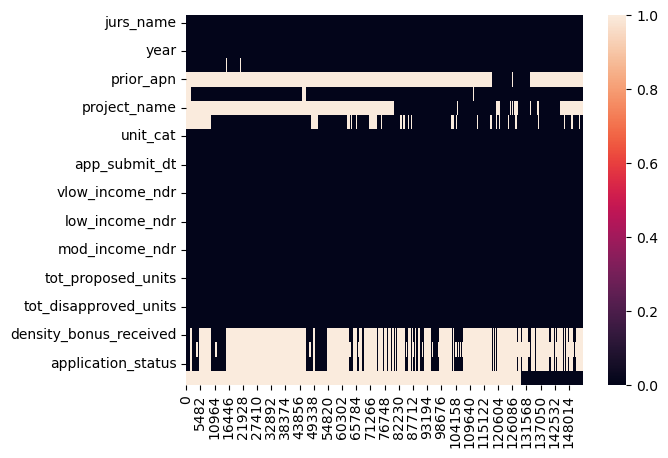

In [10]:
# Heatmap of missing values

sns.heatmap(apr_table_a.isna().transpose())
plt.show()

The missing `apn` values are not necessarily straight forward to clean. Most of the rows contain values for the other columns that are useful to our analysis and we may not want to simply drop these rows. Some of the missing values seem to be part of a larger development and the first entry in the section of missing values contains an apn that may represent the value for the entire development. However, on closer inspection, this is not true of all missing values. Furthermore, following through this is assumption and may lead us to assign incorrect apns. 

In light of this, we are going to leave these values as null for the time being. We will move our focus to the `application_status` column. This column relates to the `tot_proposed_units`, `tot_approved_units`, and `tot_disapproved_units` columns. The current goal of this project is to understand the number and percentage of proposals in this dataset that contain low income housing. We are also interested in understanding the percentage of proposals approved by the state. In order to answer both of these questions we will look into the `application_status` column and clean the column to contains the values `Approved`, `Disapproved`, or `Pending`. To acheive this, we will check each row in the `tot_approved_units` and `tot_disapproved_units` columns to fill in missing values. 

In [11]:
# First check rows for inconsistencies

approved = apr_table_a[apr_table_a['tot_proposed_units'] == apr_table_a['tot_approved_units']] # Proposals where proposed units matches approved units
disapproved = apr_table_a[apr_table_a['tot_proposed_units'] == apr_table_a['tot_disapproved_units']] # Proposals where proposed unites matches disapproved units
print("Number of proposals where proposed matches approve units: " + str(approved.shape[0]))
print("Number of proposals where proposed matches disapproved units: " + str(disapproved.shape[0]))

less_proposed = apr_table_a[apr_table_a['tot_proposed_units'] < apr_table_a['tot_approved_units']] # Proposals where no. proposed units less than approved units
more_proposed = apr_table_a[apr_table_a['tot_proposed_units'] > apr_table_a['tot_approved_units']] # Proposals where no. proposed units more than approved units
print("Number of proposals where proposed units less than number of approved units: " + str(less_proposed.shape[0]))
print("Number of proposals where proposed units more than the number of approved units: " + str(more_proposed.shape[0]))


Number of proposals where proposed matches approve units: 93617
Number of proposals where proposed matches disapproved units: 2866
Number of proposals where proposed units less than number of approved units: 96
Number of proposals where proposed units more than the number of approved units: 59762


In [12]:
less_proposed['unit_cat'].value_counts()

5 or More Units Per Structure             27
Accessory Dwelling Unit                   26
Single-Family Detached Unit               23
2-, 3-, and 4-Plex Units per Structure    17
Mobile Home Unit                           2
Single-Family Attached Unit                1
Name: unit_cat, dtype: int64

In [13]:
less_proposed[less_proposed['unit_cat'] == '5 or More Units Per Structure']

,jurs_name,cnty_name,year,apn,prior_apn,street_address,project_name,jurs_tracking_id,unit_cat,tenure,...,mod_income_ndr,above_mod_income,tot_proposed_units,tot_approved_units,tot_disapproved_units,app_submitted_sb35,density_bonus_received,density_bonus_approved,application_status,notes
62685,LOS ALTOS,SANTA CLARA,2019.0,16741066,NaN,389 First Street,NaN,SD 18-03,5 or More Units Per Structure,Owner,...,0.0,0.0,1.0,10.0,0.0,No,NaN,NaN,NaN,NaN
74361,LOS ALTOS,SANTA CLARA,2019.0,17003085,NaN,4898 El Camino Real,NaN,DR 18-05,5 or More Units Per Structure,Owner,...,0.0,0.0,6.0,28.0,0.0,No,NaN,NaN,NaN,NaN
74362,LOS ALTOS,SANTA CLARA,2019.0,16741019,NaN,425 First Street,NaN,DR 18-06,5 or More Units Per Structure,Owner,...,0.0,0.0,3.0,20.0,0.0,No,NaN,NaN,NaN,NaN
74611,LOS ALTOS,SANTA CLARA,2019.0,17004066,NaN,5150 El Camino Real,NaN,UP 18-07,5 or More Units Per Structure,Owner,...,0.0,0.0,28.0,196.0,0.0,No,NaN,NaN,NaN,NaN
83549,SAN DIEGO,SAN DIEGO,2020.0,4232821400,NaN,1420 PACIFIC BEACH DR Unit A & B,Pacific Beach Drive Townhomes,2422559,5 or More Units Per Structure,Renter,...,0.0,1.0,2.0,8.0,0.0,No,NaN,NaN,NaN,NaN
83675,CALEXICO,IMPERIAL,2019.0,058-833-022,NaN,1000 MEADOWS DR #5,BUILDING # 5 12 APARTMENT UNITS,19-0178,5 or More Units Per Structure,Renter,...,0.0,0.0,8.0,12.0,0.0,No,NaN,NaN,NaN,NaN
84002,LOS ANGELES,LOS ANGELES,2021.0,5056026033,NaN,1911 NEW ENGLAND ST S 90007,ADM-2021-5463-DB-HCA,NaN,5 or More Units Per Structure,Renter,...,0.0,36.0,40.0,41.0,0.0,No,Yes,Yes,Pending,NaN
84083,LOS ANGELES,LOS ANGELES,2018.0,5442024026,NaN,2938 ALLESANDRO ST N,DIR-2018-2207-DB,NaN,5 or More Units Per Structure,Renter,...,0.0,28.0,31.0,32.0,0.0,No,NaN,NaN,NaN,NaN
84589,RIDGECREST,KERN,2020.0,067-040-12,NaN,602 N. Norma St,Mojave View Apartments,SPR 19-07,5 or More Units Per Structure,Renter,...,0.0,0.0,75.0,76.0,0.0,Yes-Approved,NaN,NaN,NaN,NaN
85522,CALEXICO,IMPERIAL,2019.0,058-833-025,NaN,1000 MEADOWS DR #3,BUILDING #3 8 APARTMENT UNITS,19-0180,5 or More Units Per Structure,Renter,...,0.0,0.0,4.0,8.0,0.0,No,NaN,NaN,NaN,NaN


In [14]:
# Check proposed units for consistency

prop_check2 = apr_table_a[apr_table_a.loc[:,'vlow_income_dr' : 'above_mod_income'].sum(axis=1) == apr_table_a['tot_proposed_units']]
prop_check2.shape[0]

153475

In [15]:
apr_table_a['application_status'].value_counts(dropna=False)

NaN                110635
Approved            25171
Pending             13321
Complete             3927
Withdrawn             280
In Progress            66
Disapproved            50
No                      8
Applied                 6
In Review               5
Received                4
Project Routing         1
under review            1
Name: application_status, dtype: int64

Upon closer inspection of the `tot_proposed_units` and `tot_approved_units` columns, we find that there are 96 entries with more approved units than proposed units. Without deeper knowledge of how these data were collected and looking into each entry manually there are a couple possible resons:
1. A data entry error occurred. (This seems to be the case sometimes, i.e. 203 vs 230 units prop/approved)
2. The proposal represents units differently than the approved column. The `unit_cat` column might be used to represent one "unit" propsed as actually 3 or 4 or more units.

With this in mind, unless we manually examine each entry (which is outside the scope of this project), we have two possibile ways to deal with these inconsistencies. 
1. We drop the rows from the dataset.
2. We set the number of approved units equal to the number proposed.

We check the several columns pertaining to proposed units in these data for consistency. All rows from columns `vlow_income_dr` to `above_mod_income` totaled together equal `tot_proposed_units`. With this information, we will assign the value for `tot_proposed_units` to `tot_approved_units` for the rows where the number of propsed units are less than approved units. 

In [16]:
# Assign values to `tot_approved_units`[1] from `tot_proposed_units`[2] where column [1] > column [2]
table_a_up = apr_table_a.copy()
table_a_up.loc[table_a_up['tot_proposed_units'] < table_a_up['tot_approved_units'], 'tot_approved_units'] = table_a_up.loc[table_a_up['tot_proposed_units'] < table_a_up['tot_approved_units'], 'tot_proposed_units']


In [17]:
# Number low income housing propsed for more_proposed
more_proposed[more_proposed.loc[:,'vlow_income_dr':'low_income_ndr'].sum(axis=1) > 0].shape[0]

5200

In [18]:
more_proposed['application_status'].value_counts(dropna=False)

NaN                40701
Pending            11593
Approved            7054
Withdrawn            264
In Progress           66
Disapproved           45
Complete              22
Applied                6
In Review              5
Received               4
Project Routing        1
under review           1
Name: application_status, dtype: int64

In [19]:
more_proposed['notes'].value_counts(dropna=False)

NaN                                                                                                                                                                                            51426
Density Bonus Data is tracked after an affordable housing covenant is signed.                                                                                                                    868
In Review                                                                                                                                                                                        368
Under review                                                                                                                                                                                     302
Building Permit                                                                                                                                                                                  274
               

In [20]:
# Change application status to 'In Review' for rows with "In Review" or "Under Review" in `notes`
table_a_up.loc[table_a_up['notes'] == 'In Review', 'application_status'] = 'In Review'
table_a_up.loc[table_a_up['notes'] == 'Under review', 'application_status'] = 'In Review'

more_proposed.loc[more_proposed['notes'] == 'In Review', 'application_status'] = 'In Review'
more_proposed.loc[more_proposed['notes'] == 'Under review', 'application_status'] = 'In Review'

In [21]:
table_a_up['application_status'].value_counts(dropna=False)

NaN                109968
Approved            25171
Pending             13318
Complete             3927
In Review             675
Withdrawn             280
In Progress            66
Disapproved            50
No                      8
Applied                 6
Received                4
Project Routing         1
under review            1
Name: application_status, dtype: int64

In [22]:
# Change application status to approced for rows where, tot_approved_units = tot_propsed_units
table_a_up.loc[table_a_up['tot_proposed_units'] == table_a_up['tot_approved_units'], 'application_status'] = 'Approved'
more_proposed.loc[more_proposed['tot_proposed_units'] == more_proposed['tot_approved_units'], 'application_status'] = 'Approved'

In [23]:
table_a_up['application_status'].value_counts(dropna=False)

Approved           100767
NaN                 40034
Pending             11590
In Review             675
Withdrawn             264
In Progress            66
Disapproved            45
Complete               22
Applied                 6
Received                4
Project Routing         1
under review            1
Name: application_status, dtype: int64

In [24]:
more_proposed['application_status'].value_counts(dropna=False)

NaN                40034
Pending            11590
Approved            7054
In Review            675
Withdrawn            264
In Progress           66
Disapproved           45
Complete              22
Applied                6
Received               4
Project Routing        1
under review           1
Name: application_status, dtype: int64

In [25]:
# Set approved units equal to proposed units for rows with application_status = 'Approved'
more_proposed.loc[more_proposed['application_status'] == 'Approved', "tot_approved_units"] = more_proposed['tot_proposed_units']
table_a_up.loc[table_a_up['application_status'] == 'Approved', "tot_approved_units"] = table_a_up['tot_proposed_units']

more_proposed.loc[more_proposed['application_status'] == 'Approved',['tot_proposed_units', 'tot_approved_units', 'application_status']].head()

,tot_proposed_units,tot_approved_units,application_status
46361,1.0,1.0,Approved
46362,1.0,1.0,Approved
46363,1.0,1.0,Approved
46364,1.0,1.0,Approved
46365,1.0,1.0,Approved


In [26]:
# Set application status to Disapproved where tot_proposed_units = tot_disapproved_units
table_a_up.loc[table_a_up['tot_proposed_units'] == table_a_up['tot_disapproved_units'], 'application_status'] = 'Disapproved'
more_proposed.loc[more_proposed['tot_proposed_units'] == more_proposed['tot_disapproved_units'], 'application_status'] = 'Disapproved'

In [27]:
more_proposed['application_status'].value_counts(dropna=False)

NaN                37209
Pending            11590
Approved            7054
Disapproved         2879
In Review            666
Withdrawn            264
In Progress           66
Complete              22
Applied                6
Received               4
Project Routing        1
under review           1
Name: application_status, dtype: int64

In [28]:
proposed_unit_sums = table_a_up.iloc[:, 11:18].sum()
print(proposed_unit_sums)

vlow_income_dr       38897.0
vlow_income_ndr       6834.0
low_income_dr        48235.0
low_income_ndr       20691.0
mod_income_dr         9271.0
mod_income_ndr       61901.0
above_mod_income    654374.0
dtype: float64


In [29]:
total_units = proposed_unit_sums.sum()
low_income_sum = proposed_unit_sums.iloc[:4].sum()

low_income_perc = (low_income_sum / total_units) * 100
print(low_income_perc)

13.646344990436834


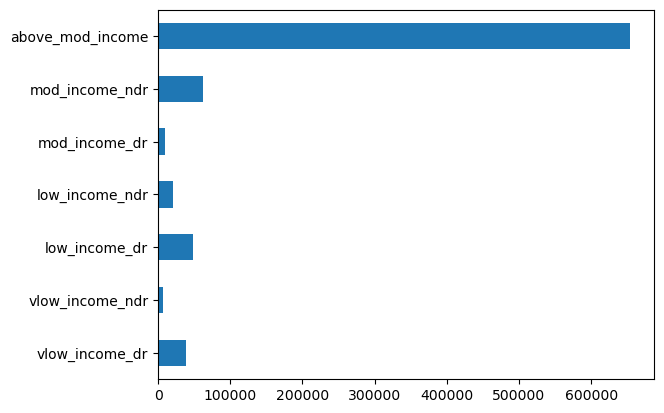

In [30]:
proposed_unit_sums.plot.barh()
plt.show()